In [1]:
# importing required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


In [2]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Step 1:Data Reading and Understanding

In [4]:
#loading data Set
geely_df = pd.read_csv('CarPrice_Assignment.csv')

In [5]:
geely_df.shape

(205, 26)

In [6]:
geely_df.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [7]:
geely_df.info()
# we have alll non-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [8]:
geely_df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [9]:
#understanding numerical and categorical data
geely_df.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

# #Step 2: Visualising the Data

In [10]:
# get the correlation
geely_df.corr()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


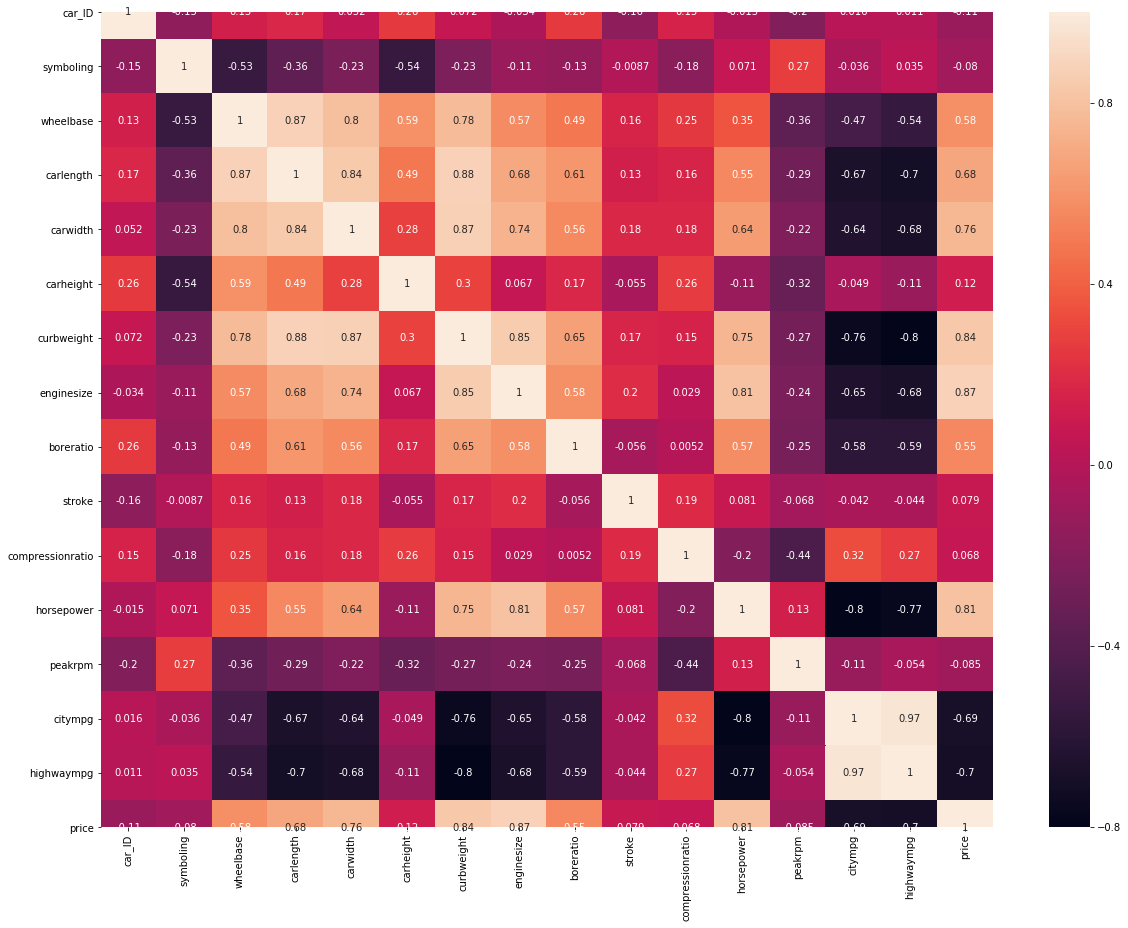

In [11]:
# plottinga heat map to understand the collinearity
plt.figure(figsize = (20,15))  
sns.heatmap(geely_df.corr(),annot= True);

In [12]:
# There is a high corelation between: 
# 1.carlength, curbweight, wheelbase and carwidth --> dropping carwidth and curbweight and wheelbase 
# 2. highwaympg and citympg(0.97) --> dropping highwaympg

geely_df.drop(['carwidth','curbweight','wheelbase','highwaympg'], axis =1, inplace = True)

#### Visualising Numerical Variables

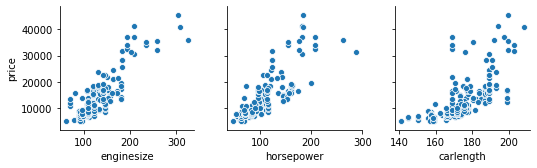

In [13]:
# price seems to have  strong correlation with carlength,enginesize,horsepower:
# plotting a pairplot with these columns against price to see if there is a linear relation.
cols= ['enginesize','horsepower','carlength']
sns.pairplot(geely_df, x_vars = cols, y_vars = 'price', kind = 'scatter');

#### Visualising Categorical Variables

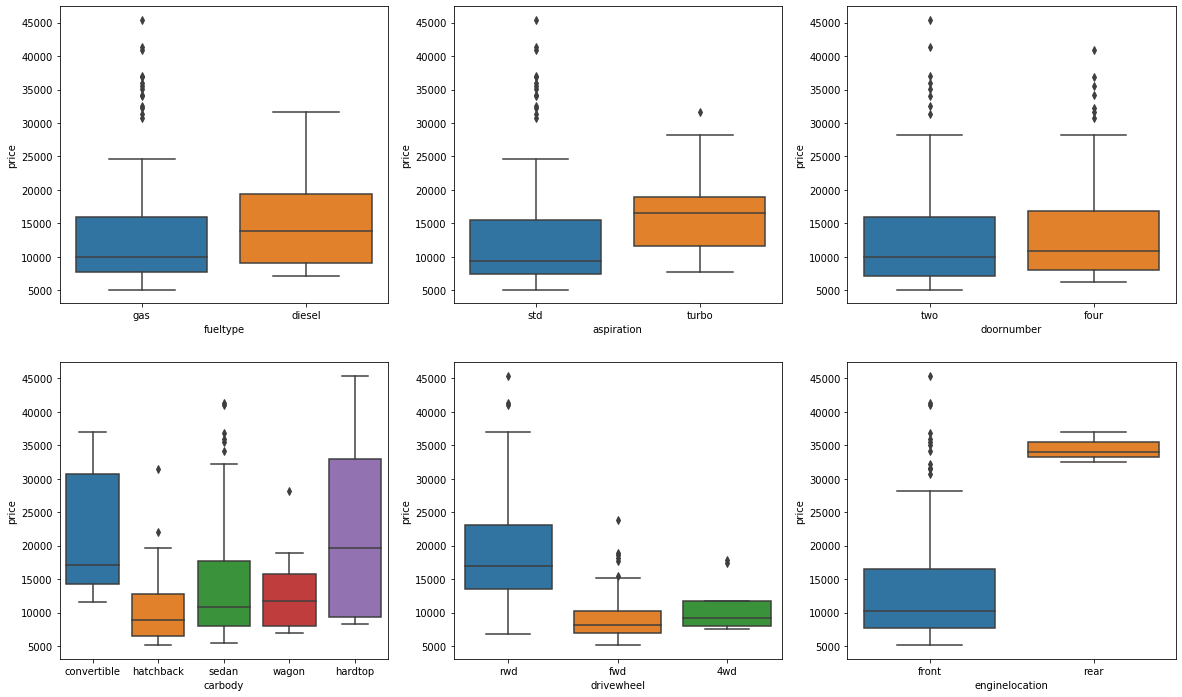

In [14]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'fueltype', y = 'price', data = geely_df)
plt.subplot(2,3,2)
sns.boxplot(x = 'aspiration', y = 'price', data = geely_df)
plt.subplot(2,3,3)
sns.boxplot(x = 'doornumber', y = 'price', data = geely_df)
plt.subplot(2,3,4)
sns.boxplot(x = 'carbody', y = 'price', data = geely_df)
plt.subplot(2,3,5)
sns.boxplot(x = 'drivewheel', y = 'price', data = geely_df)
plt.subplot(2,3,6)
sns.boxplot(x = 'enginelocation', y = 'price', data = geely_df)
plt.show()

# Step 3: Data Preparation

In [15]:
# extracting make from CarName
geely_df['make'] = geely_df['CarName'].apply(lambda x:x.split()[0])

In [16]:
geely_df['make'].value_counts().sort_index()

Nissan          1
alfa-romero     3
audi            7
bmw             8
buick           8
chevrolet       3
dodge           9
honda          13
isuzu           4
jaguar          3
maxda           2
mazda          15
mercury         1
mitsubishi     13
nissan         17
peugeot        11
plymouth        7
porcshce        1
porsche         4
renault         2
saab            6
subaru         12
toyota         31
toyouta         1
vokswagen       1
volkswagen      9
volvo          11
vw              2
Name: make, dtype: int64

In [17]:
# as observed from above, we have some incorrect values like vokswagen,vw ,porcshce ,toyouta etc. We need to correct these.
geely_df['make'].replace('Nissan', 'nissan',inplace = True)
geely_df['make'].replace('vokswagen', 'volkswagen',inplace = True)
geely_df['make'].replace('vw', 'volkswagen',inplace = True)
geely_df['make'].replace('toyouta', 'toyota',inplace = True)
geely_df['make'].replace('porcshce', 'porsche',inplace = True)
geely_df['make'].replace('maxda', 'mazda',inplace = True)

In [18]:
geely_df['make'].value_counts().sort_index()

alfa-romero     3
audi            7
bmw             8
buick           8
chevrolet       3
dodge           9
honda          13
isuzu           4
jaguar          3
mazda          17
mercury         1
mitsubishi     13
nissan         18
peugeot        11
plymouth        7
porsche         5
renault         2
saab            6
subaru         12
toyota         32
volkswagen     12
volvo          11
Name: make, dtype: int64

In [19]:
geely_df.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,carlength,carheight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,price,make
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,168.8,48.8,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,168.8,48.8,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,171.2,52.4,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,176.6,54.3,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,176.6,54.3,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,17450.0,audi


### Univariate Analysis

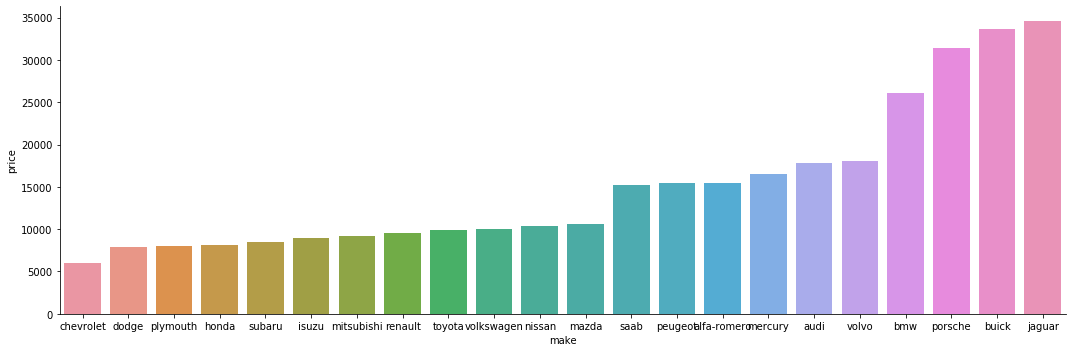

In [20]:
#Analysing Car Make vs average Price
df=pd.DataFrame(geely_df.groupby("make")["price"].mean().sort_values())
df.reset_index(inplace = True)
sns.catplot(x = 'make',  y = 'price', data  = df, kind = 'bar', aspect = 3);

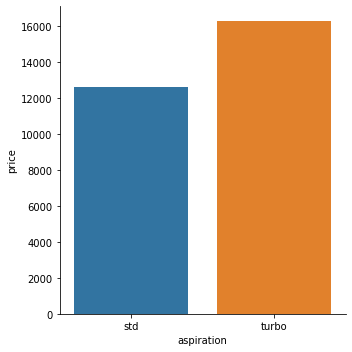

In [21]:
#Analysing aspiration vs average Price
df=pd.DataFrame(geely_df.groupby("aspiration")["price"].mean().sort_values())
df.reset_index(inplace = True)
sns.catplot(x = 'aspiration',  y = 'price', data  = df, kind = 'bar');

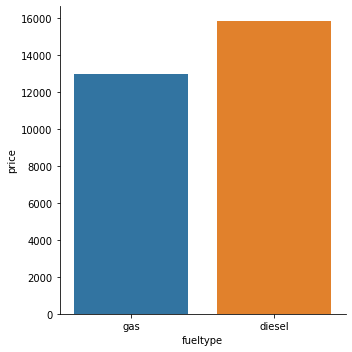

In [22]:
#Analysing Fuel type vs average Price
df=pd.DataFrame(geely_df.groupby("fueltype")["price"].mean().sort_values())
df.reset_index(inplace = True)
sns.catplot(x = 'fueltype',  y = 'price', data  = df, kind = 'bar');

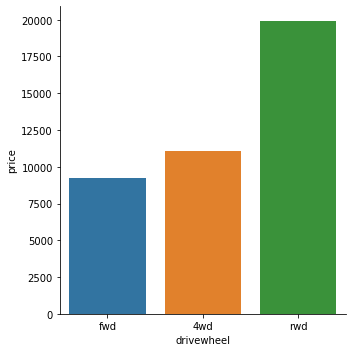

In [23]:
#Analysing Drive Wheel vs average Price
df=pd.DataFrame(geely_df.groupby("drivewheel")["price"].mean().sort_values())
df.reset_index(inplace = True)
sns.catplot(x = 'drivewheel',  y = 'price', data  = df, kind = 'bar');

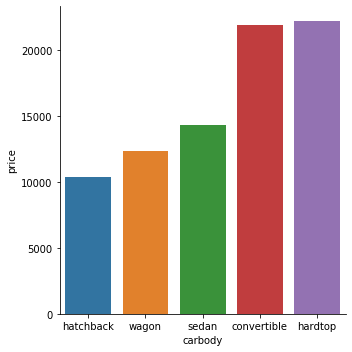

In [24]:
#Analysing Car body vs average Price
df=pd.DataFrame(geely_df.groupby("carbody")["price"].mean().sort_values())
df.reset_index(inplace = True)
sns.catplot(x = 'carbody',  y = 'price', data  = df, kind = 'bar');

In [25]:
# converting columns with binary values to 0s and 1s
geely_df['fueltype'] = geely_df['fueltype'].map({'gas': 0, 'diesel':1})
geely_df['aspiration'] = geely_df['aspiration'].map({'std': 0, 'turbo':1})
geely_df['enginelocation'] = geely_df['enginelocation'].map({'front': 0, 'rear':1})
geely_df['doornumber'] = geely_df['doornumber'].map({'two': 0, 'four':1})

In [26]:
#Dummy Variables
#The variable 'carbody' has five levels, 'drivewheel' has three levels,'enginetype' has seven levels,
#'cylindernumber' has seven levels,'fuelsystem' has eight levels.
#We need to convert these levels into integers. 
dummies = pd.get_dummies(geely_df[['carbody','drivewheel','enginetype','cylindernumber','fuelsystem', 'make']],drop_first= True)

In [27]:
geely_df = pd.concat([geely_df,dummies],axis = 1)

In [28]:
# dropping irrelevant columns
geely_df.drop(['car_ID','CarName','carbody','drivewheel','enginetype','cylindernumber','fuelsystem', 'make'], axis = 1 , inplace =True)

In [29]:
geely_df.shape

(205, 61)

# Step 4: Splitting the Data into Training and Testing Sets

In [30]:
df_train, df_test = train_test_split(geely_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [31]:
df_train.shape

(143, 61)

### Rescaling the Features

In [32]:
geely_df.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'enginelocation',
       'carlength', 'carheight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'price',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'make_audi', 'make_bmw',
       'make_buick', 'make_chevrolet', 'make_dodge', 'make_honda',
       'make_isuzu', 'make_jaguar', 'make_mazda', 'make_mercury',
       'make_mitsubishi', 'make_nissan', 'make_peugeot', 'make_plymouth',


In [33]:
# using MinMax scaling
scaler = MinMaxScaler()

In [34]:
# Applyig scaler() to all the columns except the 'dummy' variables
scale_cols = [ 'carlength', 'carheight',  'enginesize', 'boreratio',  'stroke', 
              'compressionratio', 'horsepower','peakrpm', 'citympg', 'price']

df_train[scale_cols] = scaler.fit_transform(df_train[scale_cols])

In [35]:
df_train.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,carlength,carheight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,price,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,make_audi,make_bmw,make_buick,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercury,make_mitsubishi,make_nissan,make_peugeot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo
122,1,0,0,1,0,0.426016,0.265487,0.139623,0.230159,0.525253,0.15000,0.083333,0.551020,0.500000,0.068818,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
125,3,0,0,0,0,0.452033,0.212389,0.339623,1.000000,0.464646,0.15625,0.395833,0.551020,0.166667,0.466890,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
166,1,0,0,0,0,0.448780,0.424779,0.139623,0.444444,0.449495,0.15000,0.266667,1.000000,0.361111,0.122110,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,3,0,0,0,0,0.450407,0.088496,0.260377,0.626984,0.247475,0.12500,0.262500,0.346939,0.222222,0.314446,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
199,-1,0,1,1,0,0.775610,0.858407,0.260377,0.746032,0.484848,0.03125,0.475000,0.387755,0.111111,0.382131,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [36]:
y_train = df_train.pop('price')
X_train = df_train

## Applying RFE

In [37]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [38]:
# Running RFE with the output number of the variables equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10) 
rfe = rfe.fit(X_train, y_train)

In [39]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 44),
 ('fueltype', False, 34),
 ('aspiration', False, 13),
 ('doornumber', False, 35),
 ('enginelocation', False, 38),
 ('carlength', True, 1),
 ('carheight', False, 25),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', False, 49),
 ('horsepower', False, 20),
 ('peakrpm', False, 14),
 ('citympg', False, 42),
 ('carbody_hardtop', False, 18),
 ('carbody_hatchback', False, 15),
 ('carbody_sedan', False, 17),
 ('carbody_wagon', False, 16),
 ('drivewheel_fwd', False, 51),
 ('drivewheel_rwd', False, 36),
 ('enginetype_dohcv', False, 7),
 ('enginetype_l', False, 5),
 ('enginetype_ohc', False, 37),
 ('enginetype_ohcf', False, 12),
 ('enginetype_ohcv', False, 50),
 ('enginetype_rotor', True, 1),
 ('cylindernumber_five', False, 2),
 ('cylindernumber_four', False, 3),
 ('cylindernumber_six', False, 8),
 ('cylindernumber_three', True, 1),
 ('cylindernumber_twelve', True, 1),
 ('cylindernumber_two', True, 1),
 ('fuelsystem_2bbl', F

In [40]:
cols = X_train.columns[rfe.support_]
cols

Index(['carlength', 'enginesize', 'boreratio', 'stroke', 'enginetype_rotor',
       'cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two',
       'make_bmw', 'make_porsche'],
      dtype='object')

In [41]:
X_train.columns[~rfe.support_]

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'enginelocation',
       'carheight', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six',
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi',
       'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi',
       'fuelsystem_spfi', 'make_audi', 'make_buick', 'make_chevrolet',
       'make_dodge', 'make_honda', 'make_isuzu', 'make_jaguar', 'make_mazda',
       'make_mercury', 'make_mitsubishi', 'make_nissan', 'make_peugeot',
       'make_plymouth', 'make_renault', 'make_saab', 'make_subaru',
       'make_toyota', 'make_volkswagen', 'make_volvo'],
      dtype='object')

In [42]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[cols]

## Step 5: Building a linear model

In [43]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_sm = sm.add_constant(X_train_rfe)

In [44]:
lr1 = sm.OLS(y_train,X_train_sm ).fit()   # Running the linear model

In [45]:
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     108.7
Date:                Sun, 31 May 2020   Prob (F-statistic):           7.40e-57
Time:                        17:55:26   Log-Likelihood:                 168.72
No. Observations:                 143   AIC:                            -317.4
Df Residuals:                     133   BIC:                            -287.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.07

In [46]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,enginetype_rotor,inf
7,cylindernumber_two,inf
0,carlength,22.44
2,boreratio,12.25
1,enginesize,11.72
3,stroke,6.70
6,cylindernumber_twelve,1.49
9,make_porsche,1.40
8,make_bmw,1.16
5,cylindernumber_three,1.04


In [47]:
# dropping enginetype_rotor	
X_train_rfe = X_train_rfe.drop('enginetype_rotor',axis = 1)

In [48]:
X_train_sm = sm.add_constant(X_train_rfe)

In [49]:
lr2 = sm.OLS(y_train, X_train_sm).fit()

In [50]:
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     108.7
Date:                Sun, 31 May 2020   Prob (F-statistic):           7.40e-57
Time:                        17:55:26   Log-Likelihood:                 168.72
No. Observations:                 143   AIC:                            -317.4
Df Residuals:                     133   BIC:                            -287.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.07

In [51]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,carlength,22.44
2,boreratio,12.25
1,enginesize,11.72
3,stroke,6.70
5,cylindernumber_twelve,1.49
8,make_porsche,1.40
6,cylindernumber_two,1.16
7,make_bmw,1.16
4,cylindernumber_three,1.04


In [52]:
#dropping carlength based in high VIF value
X_train_rfe = X_train_rfe.drop('carlength', axis =1)
X_train_sm = sm.add_constant(X_train_rfe)


In [53]:
lr3 = sm.OLS(y_train, X_train_sm).fit()
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     98.96
Date:                Sun, 31 May 2020   Prob (F-statistic):           2.00e-52
Time:                        17:55:26   Log-Likelihood:                 155.14
No. Observations:                 143   AIC:                            -292.3
Df Residuals:                     134   BIC:                            -265.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.04

In [54]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,enginesize,8.87
1,boreratio,7.27
2,stroke,5.68
4,cylindernumber_twelve,1.46
7,make_porsche,1.17
5,cylindernumber_two,1.16
6,make_bmw,1.16
3,cylindernumber_three,1.02


In [55]:
#dropping boreratio based in high p value and high VIF value
X_train_rfe = X_train_rfe.drop('boreratio', axis =1)
X_train_sm = sm.add_constant(X_train_rfe)

In [56]:
X_train_sm = sm.add_constant(X_train_rfe)
lr4 = sm.OLS(y_train, X_train_sm).fit()
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     113.0
Date:                Sun, 31 May 2020   Prob (F-statistic):           2.86e-53
Time:                        17:55:26   Log-Likelihood:                 154.64
No. Observations:                 143   AIC:                            -293.3
Df Residuals:                     135   BIC:                            -269.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.06

In [57]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,enginesize,5.90
1,stroke,4.96
3,cylindernumber_twelve,1.39
5,make_bmw,1.16
6,make_porsche,1.13
4,cylindernumber_two,1.09
2,cylindernumber_three,1.02


In [58]:
#dropping cylindernumber_three based in high p value and low VIF value
X_train_rfe = X_train_rfe.drop('cylindernumber_three', axis =1)
X_train_sm = sm.add_constant(X_train_rfe)

In [59]:
X_train_sm = sm.add_constant(X_train_rfe)
lr5 = sm.OLS(y_train, X_train_sm).fit()
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     131.2
Date:                Sun, 31 May 2020   Prob (F-statistic):           4.76e-54
Time:                        17:55:26   Log-Likelihood:                 153.91
No. Observations:                 143   AIC:                            -293.8
Df Residuals:                     136   BIC:                            -273.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.06

In [60]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,enginesize,5.81
1,stroke,4.86
2,cylindernumber_twelve,1.39
4,make_bmw,1.16
5,make_porsche,1.13
3,cylindernumber_two,1.09


In [61]:
#dropping stroke based in high p value and low VIF value
X_train_rfe = X_train_rfe.drop('stroke', axis =1)
X_train_sm = sm.add_constant(X_train_rfe)

In [62]:
X_train_sm = sm.add_constant(X_train_rfe)
lr6 = sm.OLS(y_train, X_train_sm).fit()
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     155.3
Date:                Sun, 31 May 2020   Prob (F-statistic):           1.24e-54
Time:                        17:55:26   Log-Likelihood:                 152.61
No. Observations:                 143   AIC:                            -293.2
Df Residuals:                     137   BIC:                            -275.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.09

In [63]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,enginesize,1.29
1,cylindernumber_twelve,1.11
3,make_bmw,1.11
4,make_porsche,1.07
2,cylindernumber_two,1.00


# Step 6: Residual Analysis of the train data

In [64]:
y_train_pred = lr6.predict(X_train_sm)

Text(0.5, 0, 'Errors')

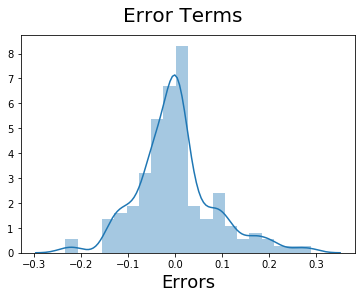

In [65]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)  
plt.xlabel('Errors', fontsize = 18)          

# Step 7: Making Predictions Using the Final Model

In [66]:
scale_cols = [ 'carlength', 'carheight',  'enginesize', 'boreratio',  'stroke', 
              'compressionratio', 'horsepower','peakrpm', 'citympg', 'price']

df_test[scale_cols] = scaler.transform(df_test[scale_cols])

In [67]:
df_test.describe()

,symboling,fueltype,aspiration,doornumber,enginelocation,carlength,carheight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,price,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,make_audi,make_bmw,make_buick,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercury,make_mitsubishi,make_nissan,make_peugeot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.0,62.0,62.0,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.000000
mean,0.919355,0.112903,0.177419,0.564516,0.032258,0.559481,0.559663,0.265673,0.556580,0.544314,0.209375,0.248858,0.393351,0.328405,0.239439,0.080645,0.338710,0.451613,0.096774,0.564516,0.419355,0.0,0.048387,0.806452,0.048387,0.064516,0.0,0.032258,0.854839,0.080645,0.0,0.0,0.0,0.258065,0.0,0.112903,0.016129,0.500000,0.048387,0.016129,0.032258,0.032258,0.048387,0.0,0.048387,0.064516,0.016129,0.0,0.064516,0.016129,0.064516,0.064516,0.048387,0.048387,0.032258,0.0,0.048387,0.016129,0.193548,0.080645,0.080645
std,1.358620,0.319058,0.385142,0.499868,0.178127,0.189947,0.215811,0.162820,0.228484,0.160738,0.273690,0.163376,0.192092,0.172009,0.233076,0.274512,0.477134,0.501716,0.298064,0.499868,0.497482,0.0,0.216335,0.398304,0.216335,0.247676,0.0,0.178127,0.355139,0.274512,0.0,0.0,0.0,0.441142,0.0,0.319058,0.127000,0.504082,0.216335,0.127000,0.178127,0.178127,0.216335,0.0,0.216335,0.247676,0.127000,0.0,0.247676,0.127000,0.247676,0.247676,0.216335,0.216335,0.178127,0.0,0.216335,0.127000,0.398304,0.274512,0.274512
min,-2.000000,0.000000,0.000000,0.000000,0.000000,0.056911,0.141593,0.067925,-0.111111,-0.060606,0.000000,0.016667,0.000000,0.027778,0.007763,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.459350,0.384956,0.177358,0.404762,0.484848,0.093750,0.107292,0.265306,0.166667,0.092342,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,1.000000,0.000000,0.547967,0.588496,0.226415,0.563492,0.585859,0.125000,0.218750,0.346939,0.305556,0.158991,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,0.000000,1.000000,0.000000,0.719919

In [68]:
y_test = df_test.pop('price')
X_test = df_test

In [69]:
X_test_sm = sm.add_constant(X_test)

In [70]:
X_test_sm = X_test_sm.drop(['symboling', 'fueltype', 'aspiration', 'doornumber', 'enginelocation',
       'carheight', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six',
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi',
       'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi',
       'fuelsystem_spfi', 'make_audi', 'make_buick', 'make_chevrolet',
       'make_dodge', 'make_honda', 'make_isuzu', 'make_jaguar', 'make_mazda',
       'make_mercury', 'make_mitsubishi', 'make_nissan', 'make_peugeot',
       'make_plymouth', 'make_renault', 'make_saab', 'make_subaru',
       'make_toyota', 'make_volkswagen', 'make_volvo',
       'enginetype_rotor','carlength','boreratio','cylindernumber_three','stroke'], 
                           axis =1)

In [71]:
X_test_sm.shape

(62, 6)

In [72]:
y_test_pred = lr6.predict(X_test_sm)

# Step 8:Model Evaluation

Text(0, 0.5, 'y_test_pred')

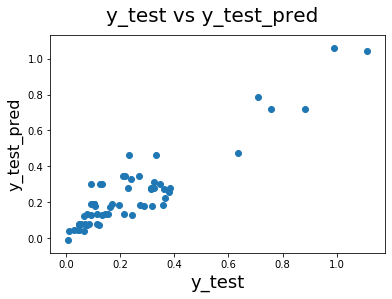

In [73]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)            
plt.xlabel('y_test', fontsize = 18)                        
plt.ylabel('y_test_pred', fontsize = 16)     

In [74]:
# Calculating R2 score
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.8456278752816554

# Conclusion

R square : 85%

Adjusted R square: 84.5%

As per the model evaluation results the model seems to be pretty stable.

The R-squared score on the test set comes out to be 84.5%

The variables that can affect price are:
1. enginesize
2. cylindernumber_twelve
3. make_bmw
4. make_porsche
5. cylindernumber_two

